# Trial U-V-Disparity

In [13]:
id = [55]

In [27]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# prepare images

In [16]:
def get_files(id:int):
    """Get the file path of the video with the given id

    Args:
        id (int): id of video in dataset

    Returns:
        string: file path to the video
    """
    # fill 2 zeros to the left of the id
    id = str(id).zfill(3)
    left = '/home/aap9002/Stereo-Road-Curvature-Dashcam/day/{id}/L_calibrated.mov'.format(id=id)
    right = '/home/aap9002/Stereo-Road-Curvature-Dashcam/day/{id}/R_calibrated.mov'.format(id=id)
    return left, right


test_example = id[0]
left_path, right_path = get_files(test_example)

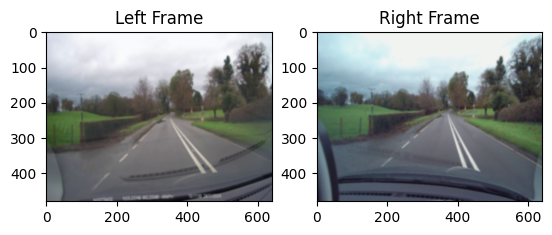

In [123]:
def get_frame(file_path:str, number:int):
    cap = cv.VideoCapture(file_path)
    cap.set(cv.CAP_PROP_POS_FRAMES, number)
    ret, frame = cap.read()
    cap.release()
    return frame

left_frame = get_frame(left_path, 900)
right_frame = get_frame(right_path, 900)

# match right to left size
left_frame = cv.resize(left_frame, (640, 480))
right_frame = cv.resize(right_frame, (640, 480))

# smoothing
left_frame = cv.GaussianBlur(left_frame, (9, 9), 0)
right_frame = cv.GaussianBlur(right_frame, (9, 9), 0)

# plot side by side
fig, ax = plt.subplots(1, 2)

ax[0].imshow(cv.cvtColor(left_frame, cv.COLOR_BGR2RGB))
ax[0].set_title('Left Frame')

ax[1].imshow(cv.cvtColor(right_frame, cv.COLOR_BGR2RGB))
ax[1].set_title('Right Frame')

plt.show()

In [124]:

# convert to grayscale
left_gray = cv.cvtColor(left_frame, cv.COLOR_BGR2GRAY)
right_gray = cv.cvtColor(right_frame, cv.COLOR_BGR2GRAY)

In [125]:
imgL = left_gray
imgR = right_gray
 
stereo = cv.StereoSGBM_create(
        minDisparity=0,
        numDisparities=16*5,  # Must be divisible by 16
        blockSize=5,
        P1=8 * 3 * 5**2,
        P2=32 * 3 * 5**2,
        disp12MaxDiff=1,
        uniquenessRatio=15,
        speckleWindowSize=50,
        speckleRange=1
    )


disparity = stereo.compute(imgL, imgR) / 16.0

valid_mask = disparity > 0

u, v = np.meshgrid(np.arange(disparity.shape[1]), np.arange(disparity.shape[0]))
u = u[valid_mask]
v = v[valid_mask]
disparity = disparity[valid_mask]

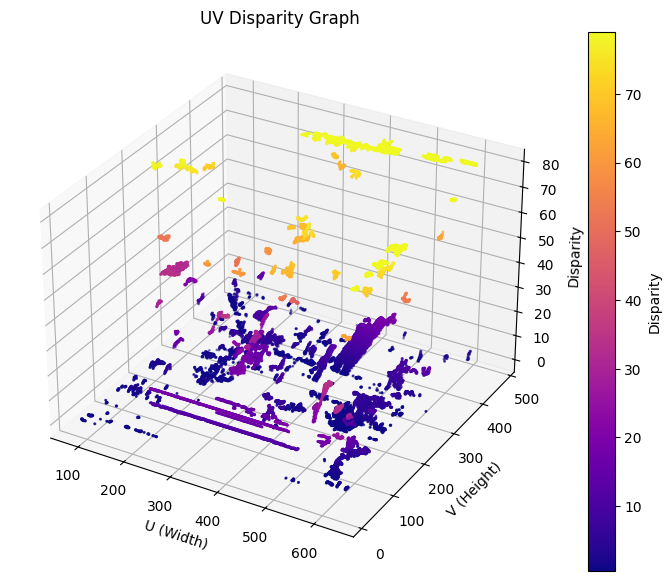

In [126]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(u, v, disparity, c=disparity, cmap='plasma', s=1)
ax.set_xlabel("U (Width)")
ax.set_ylabel("V (Height)")
ax.set_zlabel("Disparity")
ax.set_title("UV Disparity Graph")
fig.colorbar(scatter, ax=ax, label="Disparity")
plt.show()